In [24]:
import tensorflow as tf

In [25]:
# For easy reset of notebook state.
tf.keras.backend.clear_session() 

In [42]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape) #(60000, 28, 28) (60000,)

(60000, 28, 28) (60000,)


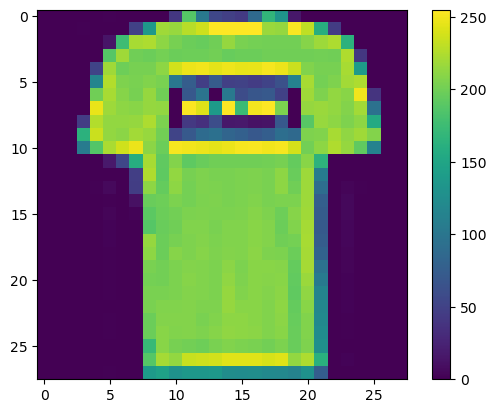

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

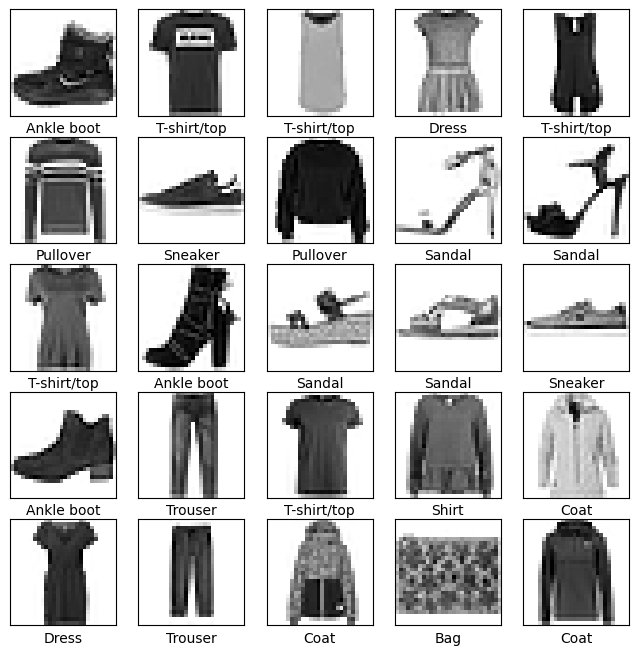

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

'''
1、缩放像素值范围：原始的图像数据是由像素值组成的，这些像素值通常在 0 到 255 的范围内（每个像素点的灰度值）。通过除以 255，我们将这些像素值转换到 0 到 1 的范围内。这种缩放使模型更容易处理较小范围的输入值。
2、加快收敛速度：当使用梯度下降和其他优化算法训练模型时，如果所有输入特征的数值范围相近，这有助于模型更快地收敛。如果输入特征的数值范围差异很大，可能会导致模型在训练过程中不稳定，从而影响学习效率。
3、提高模型表现：标准化处理可以提高模型的表现。对输入数据进行这种类型的预处理，有助于减少一些输入特征可能对学习过程产生的不成比例影响。
4、通用实践：将图像数据标准化到 [0, 1] 范围是深度学习处理图像的一种通用实践。这种方法通常被认为是最佳实践，因为它可以帮助多种类型的神经网络模型更好地进行训练。

'''
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # Model: "sequential"

/Users/shaoyongzhen/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7839 - loss: 0.6246
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8615 - loss: 0.3813
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8800 - loss: 0.3315
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8852 - loss: 0.3105
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8918 - loss: 0.2965


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc) # Test accuracy: 0.8769000172615051

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.3361
Test accuracy: 0.8794999718666077


In [32]:
predictions = model.predict(test_images)
print(type(predictions)) #<class 'numpy.ndarray'>
'''
[1.2025132e-23 1.8150118e-38 0.0000000e+00 6.0547871e-24 1.0208824e-24
 3.0965912e-01 7.8461081e-28 1.6080040e-02 4.5048401e-10 6.7426080e-01]
'''
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
<class 'numpy.ndarray'>
[6.7112711e-07 2.6712937e-07 3.8731332e-07 1.2813804e-07 5.8255176e-07
 2.0489218e-03 7.8683763e-07 1.8618565e-02 9.6401220e-07 9.7932881e-01]


In [33]:
import numpy as np
print(f"predict: {np.argmax(predictions[0])}")
print(f"label:{test_labels[0]}")

predict: 9
label:9


In [34]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

def plot_image(i, predictions_array, true_label, img,):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
               100 * np.max(predictions_array),
               class_names[true_label]), color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


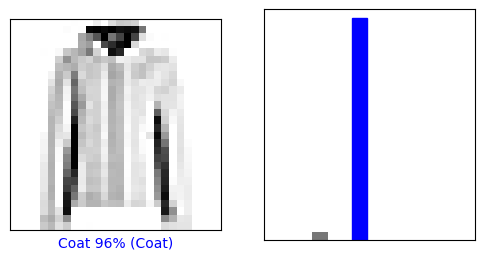

In [35]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

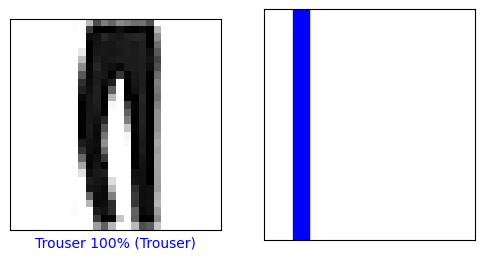

In [36]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

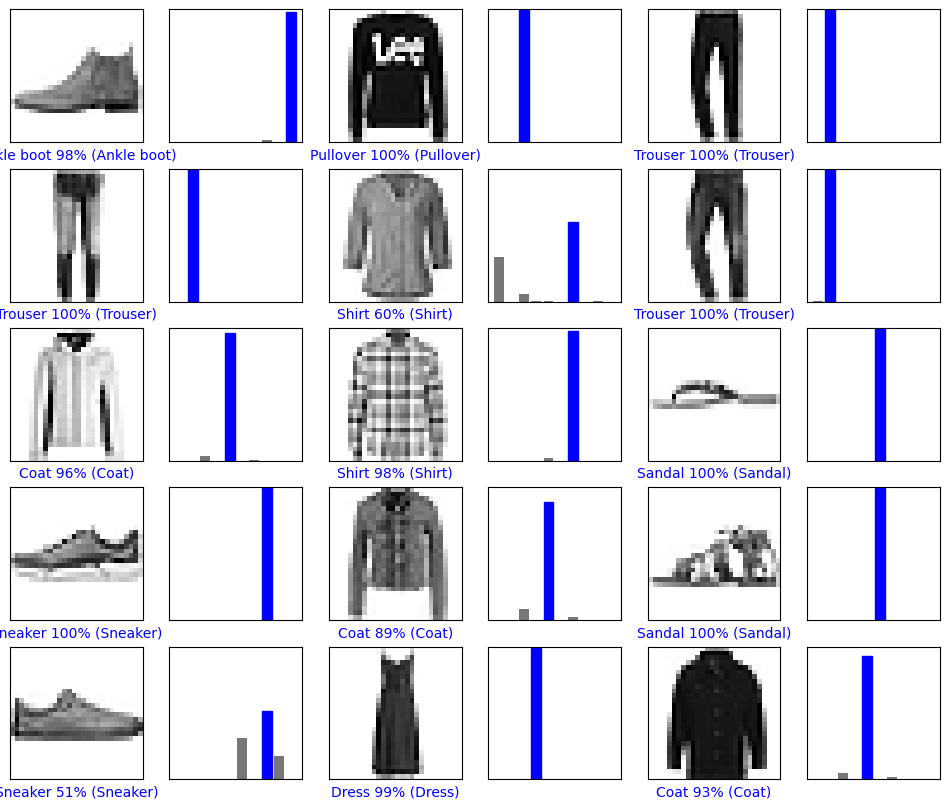

In [37]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [44]:
# Grab an image from the test dataset
print(test_images.shape)
img = test_images[0]

print(img.shape)

(10000, 28, 28)
(28, 28)


In [45]:
'''
np.expand_dims 是 NumPy 库中的一个函数，用于在数组中添加一个新的轴（维度）。这个函数的作用是在指定位置增加一个维度，从而改变数组的形状。
参数
a：输入数组。
axis：在哪个位置插入新的轴。例如，axis=0 会在数组的最外层添加一个新的轴。

这个操作常用于数据预处理，特别是在机器学习和深度学习中，当你需要调整数据的维度以符合模型的输入要求时。例如，许多深度学习模型，如 TensorFlow 或 Keras 中的模型，通常期望输入数据的形状有一个特定的维度（比如包含批量大小的维度）。

img是形状为 (28, 28) 的图像（这是一个二维数组），代表一个 28x28 像素的单通道图像。如果你要用这个图像作为深度学习模型的输入，你通常需要一个批量大小的维度，即使你只有一个图像
img 的原始形状为 (28, 28)。使用 np.expand_dims(img, 0) 后，形状变为 (1, 28, 28)，其中 1 是新添加的批量维度，表明这是一个包含单个图像的批次。
'''
img = (np.expand_dims(img,0))

print(img.shape) # (1, 28, 28)

(1, 28, 28)


In [40]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[6.7112774e-07 2.6712937e-07 3.8731437e-07 1.2813804e-07 5.8255114e-07
  2.0489215e-03 7.8683678e-07 1.8618552e-02 9.6401220e-07 9.7932875e-01]]


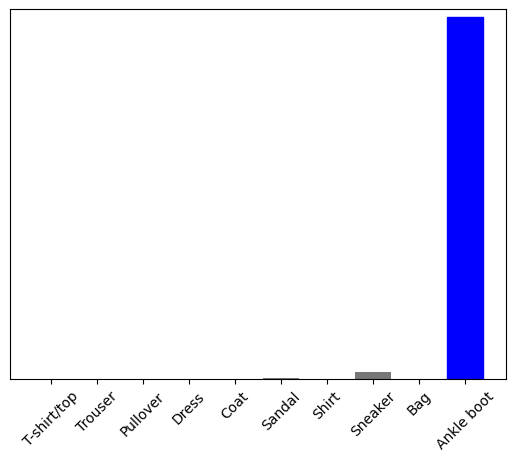

In [41]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)